In [1]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
print(X.shape,X_train.shape,X_test.shape)

(50000,) (25000,) (25000,)


In [5]:
type(X)

numpy.ndarray

In [ ]:
X[0]

In [8]:
numpy.unique(y)

array([0, 1])

In [9]:
len(numpy.unique(numpy.hstack(X)))

88585

Mean = 234.75892, Std = 172.91149458735703


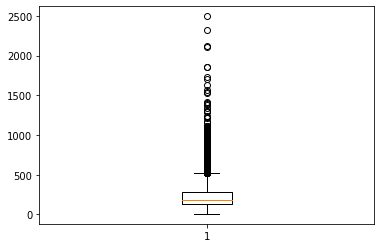

In [16]:
# Bloxplot of the length of the reviews

length = [len(x) for x in X]
print("Mean = {}, Std = {}".format(numpy.mean(length), numpy.std(length)))
pyplot.boxplot(length)
pyplot.show()

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.utils import pad_sequences

In [24]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)
X_train = pad_sequences(X_train, maxlen = 500)
X_test = pad_sequences(X_test, maxlen = 500)

In [25]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [26]:
model = Sequential()
model.add(Embedding(5000,32,input_length = 500))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, batch_size = 128)

In [ ]:
scores = model.evaluate(X_test, y_test)
print(scores)

In [ ]:
model = Sequential()
model.add(Embedding(5000,32,input_length = 500))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, batch_size = 128)

In [ ]:
scores = model.evaluate(X_test, y_test)
print(scores)